# Middle Project :  Weather Forecast (Junyi Li)

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns


In [2]:
%matplotlib inline
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
np.random.seed(66)

### Open file and review training basic data 

In [3]:
w= pd.read_csv('Weather_Forecast_Training.csv')
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51978 non-null  object 
 1   MinTemp        51694 non-null  float64
 2   MaxTemp        51849 non-null  float64
 3   Rainfall       51231 non-null  float64
 4   Evaporation    29425 non-null  float64
 5   Sunshine       27103 non-null  float64
 6   WindGustDir    48380 non-null  object 
 7   WindGustSpeed  48407 non-null  float64
 8   WindDir        50465 non-null  object 
 9   WindSpeed      50954 non-null  float64
 10  Humidity       50549 non-null  float64
 11  Pressure       46912 non-null  float64
 12  Cloud          31848 non-null  float64
 13  Temp           50915 non-null  float64
 14  RainToday      51231 non-null  object 
 15  RainTomorrow   51978 non-null  object 
dtypes: float64(11), object(5)
memory usage: 6.3+ MB


#### check Training missing value 

In [4]:
# know the missing value 
w.isna().sum()

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

#### 1. Remove data noise & outliers

In [5]:
#Remove data noise & outliers
from scipy.stats.mstats import winsorize
Col_w=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity','Pressure','Cloud','Temp']
for i in Col_w:
    np.min(winsorize(w[i], limits=[0.1, 0.1]))

for i in Col_w:
    np.max(winsorize(w[i], limits=[0.1, 0.1]))

In [6]:
#check basic data information
w.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,51694.000000,51849.000000,51231.000000,29425.000000,27103.000000,48407.000000,50954.000000,50549.000000,46912.000000,31848.000000,50915.000000
mean,12.549174,22.512698,3.639494,5.177570,6.530580,42.003016,19.092299,57.432214,1014.273338,5.175647,20.845623
std,6.376746,7.113064,11.009628,4.017662,3.946561,14.627024,9.157505,21.833045,7.278733,2.632166,6.938471
min,-8.000000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-4.400000
25%,7.900000,17.200000,0.000000,2.400000,3.200000,31.000000,13.000000,42.000000,1009.300000,3.000000,15.700000
50%,12.300000,21.800000,0.000000,4.400000,6.900000,39.000000,19.000000,58.000000,1014.200000,6.000000,20.200000
75%,17.200000,27.500000,2.200000,7.000000,9.900000,50.000000,24.000000,73.000000,1019.200000,7.000000,25.600000
max,31.400000,47.000000,371.000000,77.300000,14.500000,135.000000,83.000000,100.000000,1037.800000,8.000000,46.100000


#### 2. Std is low for Evaporation, Sunshine and Cloud, so I use their mean for the null.

In [7]:

w['Evaporation'].fillna(value=w['Evaporation'].mean(), inplace=True)
w['Sunshine'].fillna(value=w['Sunshine'].mean(), inplace=True)
w['Cloud'].fillna(value=w['Cloud'].mean(), inplace=True)


 #### 3. drop other missing null

In [8]:
w.dropna(how='any',inplace=True)

#### 4. check duplicate

In [9]:
print(f"There are {w.duplicated().sum()} duplicated records.")

There are 0 duplicated records.


#### 5. Replace "yes" to "1", and "no" to"0".

In [10]:
#change yes to 1, no to 0
w2=w.applymap(lambda x: 1 if x == 'Yes' else x)
w2=w2.applymap(lambda x: 0 if x == 'No' else x)

### Do same steps for the testing data

In [11]:
t= pd.read_csv('Weather_Forecast_Testing.csv')
from scipy.stats.mstats import winsorize
Col_t=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity','Pressure','Cloud','Temp']
for i in Col_w:
    np.min(winsorize(w[i], limits=[0.1, 0.1]))
for i in Col_w:
    np.max(winsorize(w[i], limits=[0.1, 0.1]))

# replace null with mean
t['Evaporation'].fillna(value=t['Evaporation'].mean(), inplace=True)
t['Sunshine'].fillna(value=t['Sunshine'].mean(), inplace=True)
t['Cloud'].fillna(value=t['Cloud'].mean(), inplace=True)

# drop null
t.dropna(how='any',inplace=True)

#check duplicate
print(f"There are {t.duplicated().sum()} duplicated records.")

#change yes to 1, no to 0
t2=t.applymap(lambda x: 1 if x == 'Yes' else x)
t2=t2.applymap(lambda x: 0 if x == 'No' else x)


There are 0 duplicated records.


 # Exploratory Data Analysis (EDA)


In [12]:
#relationship analysis

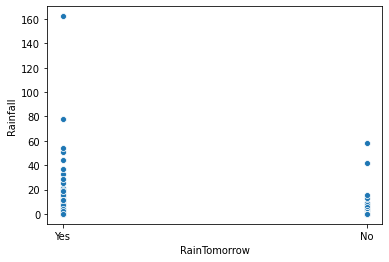

In [13]:
#Rainfall today means there are great chance tomorrow will get rain
c=w.sample(frac=0.005) #sample 40
sns.scatterplot(x="RainTomorrow", y='Rainfall', data=c)

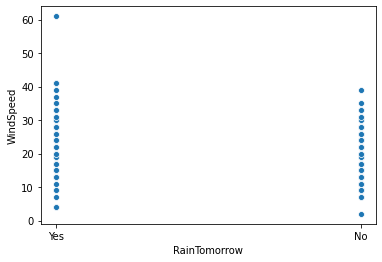

In [14]:
# WindSpeed has not much influence
d=w.sample(frac=0.005) #sample 40
sns.scatterplot(x="RainTomorrow", y='WindSpeed', data=d)

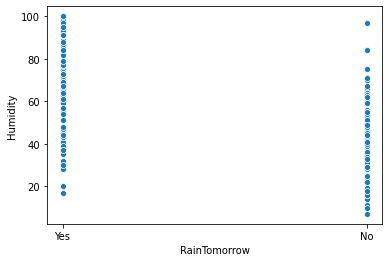

In [15]:
# Humidity will have influence 
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='Humidity', data=d)

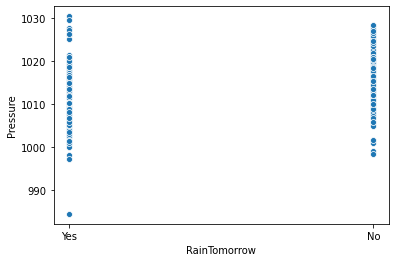

In [16]:
# Pressure not much 
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='Pressure', data=d)

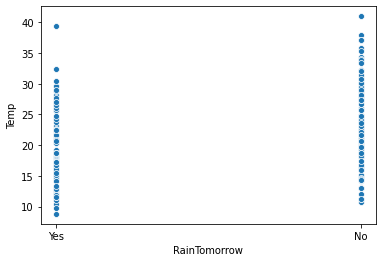

In [17]:
# Temp yes  
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='Temp', data=d)

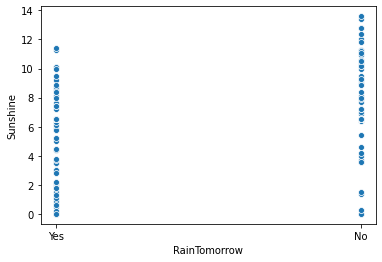

In [18]:
# Sunshine has influence 
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='Sunshine', data=d)

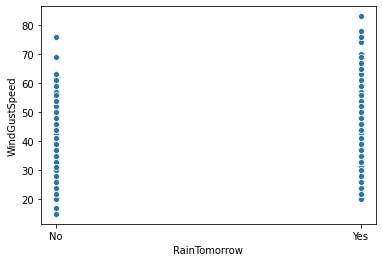

In [19]:
# WindGustSpeed has influence 
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='WindGustSpeed', data=d)

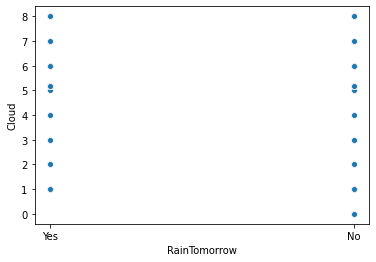

In [20]:
# Cloud has influence 
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='Cloud', data=d)

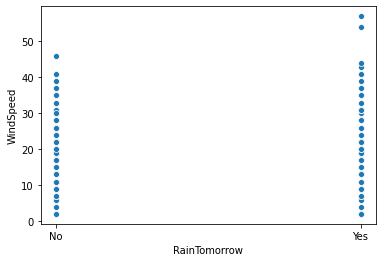

In [21]:
# Cloud has very little influence 
d=w.sample(frac=0.005) 
sns.scatterplot(x="RainTomorrow", y='WindSpeed', data=d)

# SECTION 2

## 1. Clustering


In [22]:
# get sample (5%)
training=w2.sample(frac=0.05) 

#### 1.1    Normalize training data 

In [23]:
# Get ride of WindGustDir and WindDir,which have little relation to raintomorrow.
training=pd.DataFrame(training, columns=['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Temp','RainToday','RainTomorrow'])
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(training)
df_normalized = pd.DataFrame(np_scaled, columns=training.columns, index=training.index)
df_normalized



,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
20556,0.000000,0.087164,0.476685,0.099099,0.211538,0.427083,0.687375,0.303448,0.0,0.0
13631,0.010490,0.077441,0.476685,0.171171,0.211538,0.916667,0.507014,0.172414,1.0,1.0
33867,0.001748,0.087164,0.476685,0.198198,0.211538,0.333333,0.599198,0.450575,0.0,0.0
17825,0.000000,0.087164,0.476685,0.270270,0.461538,0.406250,0.627255,0.526437,0.0,0.0
24211,0.000000,0.026936,0.175182,0.099099,0.211538,0.656250,0.741483,0.305747,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34278,0.000000,0.282828,0.883212,0.306306,0.346154,0.052083,0.376754,0.806897,0.0,0.0
10805,0.038462,0.006734,0.642336,0.090090,0.134615,0.500000,0.741483,0.372414,1.0,0.0
878,0.000000,0.087164,0.476685,0.387387,0.673077,0.281250,0.627255,0.708046,0.0,0.0
40547,0.166084,0.087164,0.598540,0.468468,0.673077,0.479167,0.458918,0.434483,1.0,1.0


#### Normalize testing data 


In [24]:
# Get ride of WindGustDir and WindDir,which have little relation to raintomorrow.



testing=pd.DataFrame(t2, columns=['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Temp','RainToday'])
min_max_scaler_t = preprocessing.MinMaxScaler()
np_scaled_t = min_max_scaler_t.fit_transform(testing)
df_normalized_t = pd.DataFrame(np_scaled_t, columns=testing.columns, index=testing.index)
df_normalized_t

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Temp,RainToday
0,0.011970,0.034884,0.100000,0.572727,0.235294,0.686869,0.305263,0.386792,1.0
1,0.105550,0.017442,0.414286,0.372727,0.200000,0.454545,0.592982,0.172170,1.0
2,0.000544,0.040698,0.664286,0.272727,0.152941,0.474747,0.638596,0.283019,0.0
3,0.000000,0.494186,0.469852,0.272727,0.200000,0.101010,0.529825,0.735849,0.0
4,0.000000,0.087209,0.200000,0.218182,0.129412,0.515152,0.635088,0.492925,0.0
...,...,...,...,...,...,...,...,...,...
12988,0.000000,0.074839,0.469852,0.309091,0.211765,0.616162,0.661404,0.386792,0.0
12990,0.000000,0.069767,0.828571,0.309091,0.282353,0.222222,0.661404,0.573113,0.0
12991,0.000000,0.037791,0.214286,0.409091,0.282353,0.444444,0.580702,0.358491,0.0
12992,0.002720,0.074839,0.728571,0.272727,0.211765,0.464646,0.703509,0.391509,0.0


### split training in 75%-25% to test the model

In [25]:
X = df_normalized.drop(labels=['RainTomorrow'], axis=1)
y = df_normalized['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
print(f"train data size is {X_train.shape}")

train data size is (1623, 9)


#### 1. Kmean method ( find the best K)

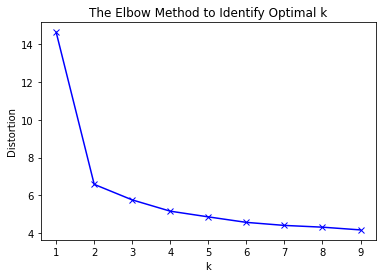

In [26]:
dist_matrix = pd.DataFrame(distance_matrix(X.values,
                           X.values, p=2),
                           index=X.index,
                           columns=X.index)

## Elbow Method (Codes)

from scipy.spatial.distance import cdist
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dist_matrix)
    kmeanModel.fit(dist_matrix)
    distortions.append(sum(np.min(cdist(dist_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dist_matrix.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()


### set up two functions for later use

In [27]:
## I will choose 2 as k according to previos best k mean 
def majority_labels(km_labels, y_true):
    cluster_0_yes=0
    cluster_0_no =0
    cluster_1_yes=0
    cluster_1_no =0

    for i in range(len(km_labels)):
        if y_true.iloc[i] == 1:
            if km_labels[i] == 0:
                cluster_0_yes += 1
            else:
                cluster_1_yes += 1
        else:
            if km_labels[i] == 0:
                cluster_0_no += 1
            else:
                cluster_1_no += 1
    cluster_0 = 1 if cluster_0_yes > cluster_0_no else 0
    cluster_1 = 1 if cluster_1_yes > cluster_1_no else 0
    return cluster_0, cluster_1


def classify_by_cluster(label0, label1, test_labels):
    class_out = []
    for label in test_labels:
        if label == 0:
            class_out.append(label0)
        else:
            class_out.append(label1)
    return class_out

### Accuracy 

In [28]:
kmeans = KMeans(n_clusters=2, random_state=47).fit(X_train)
kmeans_label0, kmeans_label1 = majority_labels(kmeans.labels_, y_train)

val_pred_kmeans = classify_by_cluster(kmeans_label0, kmeans_label1, kmeans.predict(X_test))
print(metrics.accuracy_score(y_test, val_pred_kmeans))


0.6284658040665434


### Predict Weather for the testing set 

In [29]:
t_IDs = t2['ID']

km_testing = KMeans(n_clusters=2, random_state=47).fit(X)
kmt_label0, kmt_label1 = majority_labels(km_testing.labels_, y)

Prediction_km = classify_by_cluster(kmt_label0, kmt_label1, km_testing.predict(df_normalized_t))

## 2.  HAC 

In [30]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

df_merged = pd.concat([X_train, X_test])

hac = AgglomerativeClustering(n_clusters=2).fit(df_merged)
hac_labels = hac.labels_
hac_labels_train = hac_labels[:len(X_train)]
hac_label0, hac_label1 = majority_labels(hac_labels_train, y_train)

hac_labels_val = hac_labels[-len(X_test):]
val_pred_hac = classify_by_cluster(hac_label0, hac_label1, hac_labels_val)
print(metrics.accuracy_score(y_test, val_pred_hac))

0.6284658040665434


### Prediction 

In [31]:

hac_labels_val = hac_labels[-len(df_normalized_t):]
Prediction_hac = classify_by_cluster(hac_label0, hac_label1, hac_labels_val)

print(len(df_merged))

2164


# 3 Decision tree 


### use DecisionTreeClassifier()


In [32]:
clf = DecisionTreeClassifier(random_state=47, criterion="entropy", min_samples_split=2, max_depth=5, min_samples_leaf=5, max_leaf_nodes= 20)
clf


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=20,
                       min_samples_leaf=5, random_state=47)

In [33]:
#note
X = df_normalized.drop(labels=['RainTomorrow'], axis=1)
y = df_normalized['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
print(f"train data size is {X_train.shape}")

train data size is (1623, 9)


### Accuracy

In [34]:
clf.fit(X_train,y_train)
y_pred_dct = clf.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_dct)*100, 2)}%")
clf.tree_.max_depth

Accuracy: 75.6%


5

## Hyperparameter Fine Tuning
###GridSearchCV()

In [35]:
## Model Hyperparameter Fine Tuning

param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_leaf_nodes=20,
                                              min_samples_leaf=5,
                                              random_state=47),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [36]:
## Repeated Hold-Out Method
import numpy as np
from sklearn.model_selection import ShuffleSplit
bstrap = ShuffleSplit(n_splits=10, test_size=0.3, random_state=16)

In [37]:
grid_bstrap = GridSearchCV(clf, param_grid, cv=bstrap)

In [38]:
grid_bstrap.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=16, test_size=0.3, train_size=None),
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_leaf_nodes=20,
                                              min_samples_leaf=5,
                                              random_state=47),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [39]:
## Hyperparameters for Best Performinig Model

print(f"Accuracy: {round(grid_bstrap.best_score_*100, 2)}%")
for key, value in grid_bstrap.best_params_.items():
  print(f"Hyperparameter: {key}; Value: {value}")

Accuracy: 74.5%
Hyperparameter: criterion; Value: gini
Hyperparameter: max_depth; Value: 5
Hyperparameter: max_leaf_nodes; Value: 20
Hyperparameter: min_samples_leaf; Value: 1
Hyperparameter: min_samples_split; Value: 20


### Prediction 

In [40]:
clf2 = DecisionTreeClassifier(random_state=47, criterion="entropy", min_samples_split=10, max_depth=5, min_samples_leaf=1, max_leaf_nodes= 20).fit(X,y)
predict_clf = clf2.predict(df_normalized_t)

# Naive Bayes Classification

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [42]:
X = StandardScaler().fit_transform(X)
pd.DataFrame(X).applymap(lambda x: abs(x))

,0,1,2,3,4,5,6,7,8
0,0.351633,0.025494,0.035722,1.537135,0.759658,0.541828,0.836670,0.929938,0.674019
1,0.238559,0.196545,0.035722,0.980096,0.759658,1.635504,0.450179,1.762624,1.483639
2,0.332788,0.025494,0.035722,0.771206,0.759658,0.958764,0.207544,0.005009,0.674019
3,0.351633,0.025494,0.035722,0.214167,0.718158,0.634481,0.407720,0.487091,0.674019
4,0.351633,1.085018,1.429115,1.537135,0.759658,0.477348,1.222725,0.915329,0.674019
...,...,...,...,...,...,...,...,...,...
2159,0.351633,3.416577,1.843044,0.064353,0.036089,2.209572,1.379570,2.269333,0.674019
2160,0.062973,1.440407,0.729836,1.606765,1.214371,0.217545,1.222725,0.491681,1.483639
2161,0.351633,0.025494,0.035722,0.691022,1.968618,1.190395,0.407720,1.641166,0.674019
2162,1.438713,0.025494,0.527434,1.317692,1.968618,0.310197,0.793339,0.097251,1.483639


### Accuracy

In [43]:
bnb = BernoulliNB()
bnb_2 = bnb.fit(X_train, y_train)
bnb_pred=bnb_2.predict(X_test)
metrics.accuracy_score(y_test, bnb_pred)



0.6654343807763401

### Make prediction

In [44]:
Prediction_nb=bnb_2.predict(df_normalized_t)

### Generate CSV

In [63]:
Prediction_clf=predict_clf.tolist()
#final = pd.concat([Prediction_km, Prediction_hac, predict_clf], axis=1 )
#final
from pandas.core.frame import DataFrame

c={'location': t2['Location'], "kmean" : Prediction_km, "DT":Prediction_clf}
data=DataFrame(c)
#change yes to 1, no to 0
data=data.applymap(lambda x: 'Yes' if x == 1 else x)
data=data.applymap(lambda x: 'No' if x == 0 else x)
data.to_csv('final_prediction.csv')


